In [39]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
from imblearn.over_sampling import SMOTE
# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample

# Our example dataset
from sklearn.datasets import load_boston

# Classifiers
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Hyperparameters distributions
from scipy.stats import randint
from scipy.stats import uniform

# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussian Processes
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaXStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta


from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

In [20]:
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,make_scorer,roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
import pydot
import os
from statistics import mode 
# Classifier
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
from time import time
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

from IPython.display import display, HTML
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# I. Loading the dataset and performing data preprocessing

In [3]:
testData = "dataset/test.csv"

dataA = pd.read_csv(testData, sep = ',' , index_col = 'ID_code')
dfTest = pd.DataFrame(dataA)

dfTest.head(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.72

In [4]:
trainData = "dataset/train.csv"
dataB = pd.read_csv(trainData, sep = ',', index_col = 'ID_code')
dfTrain = pd.DataFrame(dataB)

dfTrain.head(10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.

In [5]:
sample_submission = "dataset/sample_submission.csv"
dataC = pd.read_csv(sample_submission, sep = ',', index_col = 'ID_code')
df_sample = pd.DataFrame(dataC)

df_sample.head(10)

,target
ID_code,
test_0,0
test_1,0
test_2,0
test_3,0
test_4,0
test_5,0
test_6,0
test_7,0
test_8,0


### We first check for missing values in the dataset. The dataset is complete and there is no missing values

In [6]:
print(dfTest.isnull().sum())
print(dfTest.shape)
dfTest.info()

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0
var_76     0

In [7]:
print(dfTrain.isnull().sum())
print(dfTrain.shape)
dfTrain.info()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0

In [8]:
dfTrain.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [9]:
dfTest.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [95]:
dfTrain["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [96]:
# sns.heatmap(dfTrain)

In [10]:
y_train_complete = dfTrain.iloc[:,0:1]
X_train_complete = dfTrain.drop(['target'], axis=1)


print(y_train_complete.shape)
print(X_train_complete.shape)



(200000, 1)
(200000, 200)


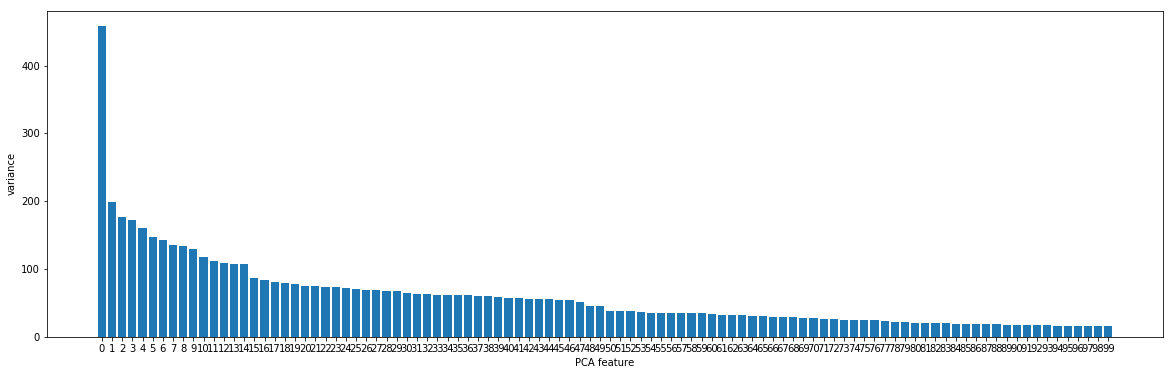

In [73]:
# Create a PCA instance: pca
pca = PCA()

# Fit the data
pca.fit(X_train_complete)

# Plot the explained variances
n = 100
features = range(pca.n_components_)
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(features[:n], pca.explained_variance_[:n])
ax.set_xlabel('PCA feature')
ax.set_ylabel('variance')
ax.set_xticks(features[:n])
plt.savefig(os.path.join('1-pcafeatures.png'), dpi=300, format='png')
plt.show()
eigen_values = pd.Series(pca.explained_variance_)

In [75]:
# Determine how many features must be kept to retain 95% of the variance
total_variance = np.sum(eigen_values)
num_pca_features_var_retained = []
for num_components in range(X.shape[1]):
    ratio = np.sum(eigen_values[:num_components]) / total_variance
    num_pca_features_var_retained.append(ratio)

print(num_pca_features_var_retained[34])
plt.plot(num_pca_features_var_retained)

NameError: name 'X' is not defined

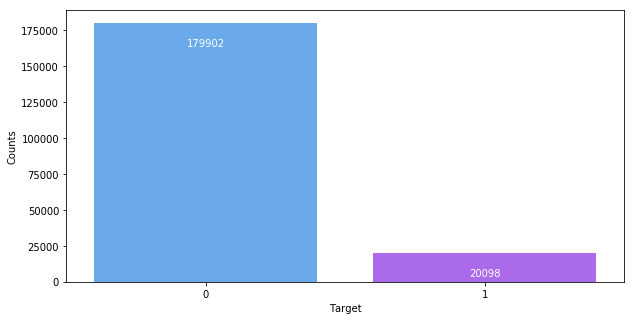

In [76]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
fig = sns.countplot(dfTrain.target.values, palette="cool")


for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points') 

        
ax.set_xlabel("Target")
ax.set_ylabel("Counts")

plt.savefig(os.path.join('dataimbalance.png'), dpi=300, format='png')



In [77]:
dfTrain.loc[dfTrain.target==1].shape[0] / dfTrain.loc[dfTrain.target==0].shape[0]

0.1117163789174106

# Random Forest Top Features

In [79]:
parameters = {'min_samples_leaf': [20, 21]}
forest = RandomForestClassifier(max_depth=15, n_estimators=15)
grid = GridSearchCV(forest, parameters, cv=3, n_jobs=-1, verbose=2, scoring=make_scorer(roc_auc_score))

In [80]:
grid.fit(dfTrain.drop("target", axis=1).values, dfTrain.target.values)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [20, 21]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=2)

In [81]:
grid.best_score_

0.5

In [82]:
grid.best_params_

{'min_samples_leaf': 20}

In [83]:
n_top = 10

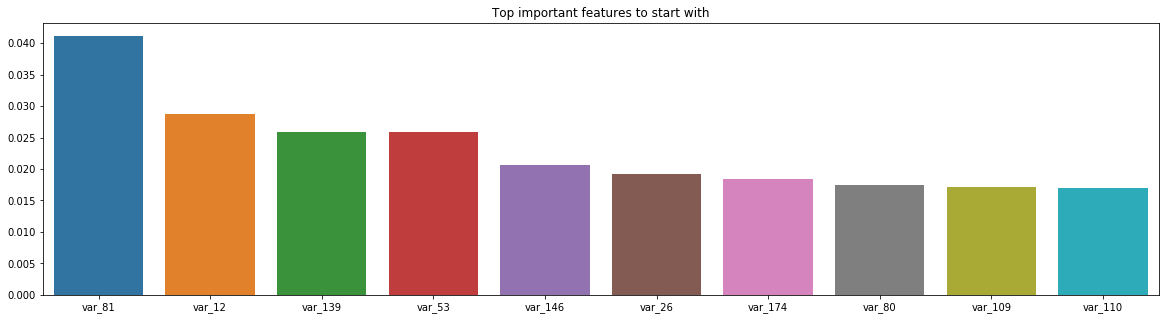

In [84]:
importances = grid.best_estimator_.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = dfTrain.drop("target", axis=1).columns.values

plt.figure(figsize=(20,5))
sns.barplot(x=feature_names[idx], y=importances[idx]);
plt.title("Top important features to start with");

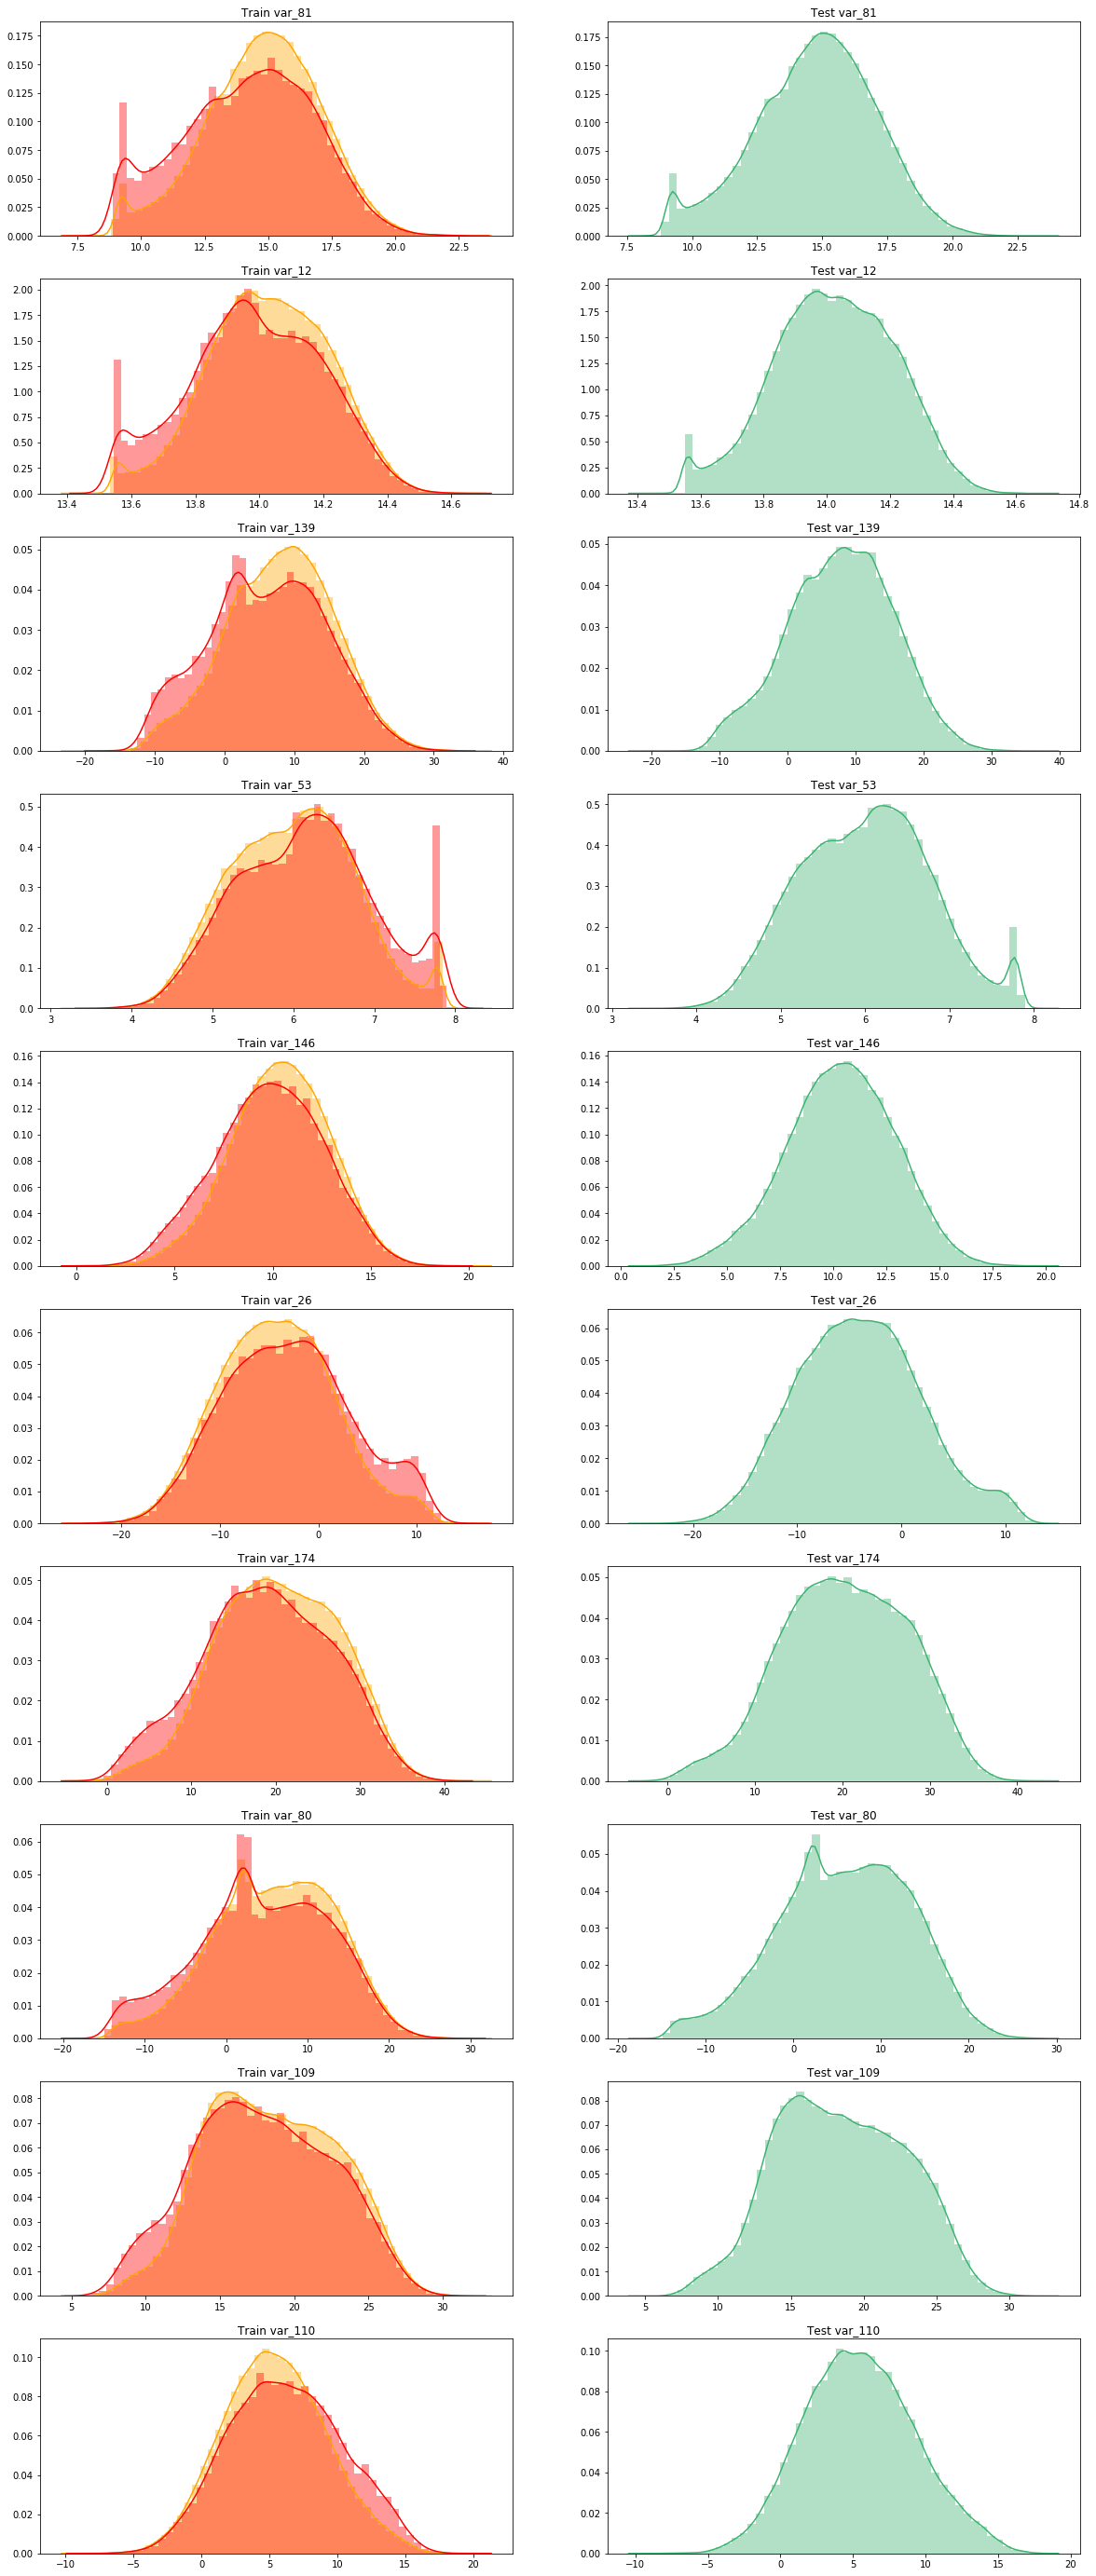

In [85]:
fig, ax = plt.subplots(n_top,2,figsize=(20,5*n_top))

for n in range(n_top):
    sns.distplot(dfTrain.loc[dfTrain.target==0, feature_names[idx][n]], ax=ax[n,0], color="Orange", norm_hist=True)
    sns.distplot(dfTrain.loc[dfTrain.target==1, feature_names[idx][n]], ax=ax[n,0], color="Red", norm_hist=True)
    sns.distplot(dfTest.loc[:, feature_names[idx][n]], ax=ax[n,1], color="Mediumseagreen", norm_hist=True)
    ax[n,0].set_title("Train {}".format(feature_names[idx][n]))
    ax[n,1].set_title("Test {}".format(feature_names[idx][n]))
    ax[n,0].set_xlabel("")
    ax[n,1].set_xlabel("")

#  II. Testing classifications

# a) Random Forests

In [17]:
print(y_train_complete.shape)
print(X_train_complete.shape)

(200000, 1)
(200000, 200)


# Since we don't have the test label y available, we are splitting the train dataset into train and test in order to tune and evaluate the perfomance of the model in our machine.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_train_complete,y_train_complete, test_size=0.20,random_state=42)

# Tuning the number of n_estimator parameter for the RF

/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

NameError: name 'HandlerLine2D' is not defined

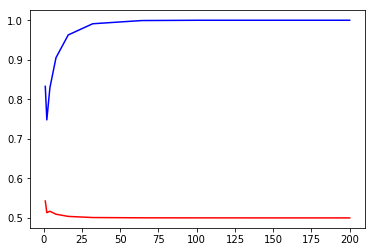

In [107]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-RandomForests_AUC(n_estimators).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

# Tuning the depth of the tree for the RF model

/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

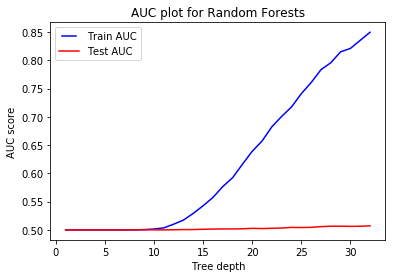

In [108]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth,n_estimators=16, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-3-RandomForests_AUC(TreeDepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

# Building RF classifier model with the chosen parameter

In [257]:
rfc = RandomForestClassifier(random_state=101, max_depth=11,n_estimators=16)
rfc_clf = rfc.fit(X_train_norm, y_train_complete)

In [ ]:
rfc_pred = rfc_clf.predict(X_test_norm)

In [258]:
rfc_pred.shape

(60000,)

In [259]:
dfTrain.index

Index(['train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'train_5',
       'train_6', 'train_7', 'train_8', 'train_9',
       ...
       'train_199990', 'train_199991', 'train_199992', 'train_199993',
       'train_199994', 'train_199995', 'train_199996', 'train_199997',
       'train_199998', 'train_199999'],
      dtype='object', name='ID_code', length=200000)

In [311]:
pred = pd.DataFrame(rfc_pred, index = df_sample.index, columns = dfTrain.columns[0:1])

In [261]:
pred.head()

,target
ID_code,
test_0,0
test_1,0
test_2,0
test_3,0
test_4,0


In [192]:
pred.to_csv('rfpredictions.csv', sep=',')

In [262]:

print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))



Results from the default parameters:
Accuracy is  89.76166666666666
[[53856     0]
 [ 6143     1]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53856
           1       1.00      0.00      0.00      6144

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.95      0.50      0.47     60000
weighted avg       0.91      0.90      0.85     60000



In [175]:
y_test.shape

(60000, 1)

In [269]:
rfc_pred.shape

(60000,)

# --------------------------------------------------------------- #

# 1) XGBOOST classifier (Default hyperparameters)

# --------------------------------------------------------------- #

In [14]:
XGB = xgb.XGBClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_complete,y_train_complete, test_size=0.20,random_state=42)

In [109]:
t0 = time()
xgb_clf = XGB.fit(X_train, y_train)
t1 = time()
xgb_pred = xgb_clf.predict(X_test)
t2 = time()

In [110]:
print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test,xgb_pred)*100)
print("classification time: ", round(t2-t1, 3))
print("training time: ", round(t1-t0, 3))
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

Results from the default parameters:
Accuracy is  89.895
classification time:  0.364
training time:  278.421
[[35896     7]
 [ 4035    62]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.90      0.02      0.03      4097

   micro avg       0.90      0.90      0.90     40000
   macro avg       0.90      0.51      0.49     40000
weighted avg       0.90      0.90      0.85     40000



In [304]:
pred = pd.DataFrame(xgb_pred, index = df_sample.index, columns = dfTrain.columns[0:1])

In [305]:
pred.to_csv('XGBOOSTclassifier(Default hyperparameters).csv', sep=',')

In [310]:
pred['target'].value_counts()

0    198732
1      1268
Name: target, dtype: int64

# --------------------------------------------------------------- #

# 2) XGBoost (default parameters)- upsampled data

# --------------------------------------------------------------- #

In [ ]:
XGB = xgb.XGBClassifier(random_state=42)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(X_train_complete.values, y_train_complete.values,
                                                  test_size = .3,
                                                  random_state=12)

In [12]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
t0 = time()
xgb_clf = XGB.fit(x_train_res, y_train_res)
t1 = time()
xgb_pred = xgb_clf.predict(x_val)
t2 = time()

In [17]:
print("Results from the default parametersc (upsampled data):")
print("Accuracy is ", accuracy_score(y_val,xgb_pred)*100)
print("classification time: ", round(t2-t1, 3))
print("training time: ", round(t1-t0, 3))
print(confusion_matrix(y_val,xgb_pred))
print(classification_report(y_val,xgb_pred))

Results from the default parametersc (upsampled data):
Accuracy is  79.90333333333334
classification time:  0.527
training time:  488.041
[[45750  8233]
 [ 3825  2192]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     53983
           1       0.21      0.36      0.27      6017

   micro avg       0.80      0.80      0.80     60000
   macro avg       0.57      0.61      0.58     60000
weighted avg       0.85      0.80      0.82     60000



In [339]:
pred = pd.DataFrame(xgb_pred, index = df_sample.index, columns = dfTrain.columns[0:1])

In [340]:
pred.to_csv('XGBoost(default parameters)-upsampled data.csv', sep=',')

In [341]:
pred['target'].value_counts()

0    176231
1     23769
Name: target, dtype: int64

# --------------------------------------------------------------- # 

# 3) XGBoost (default parameters)- downsampled data

#  --------------------------------------------------------------- #

In [30]:
# Separate majority and minority classes
df2_majority = dfTrain[dfTrain['target']==0]
df2_minority = dfTrain[dfTrain['target']==1]
n_samples = df2_minority.target.sum()

df2_majority_downsampled = resample(df2_majority, replace=False, n_samples=n_samples, random_state=99)

In [31]:
df_downsampled = pd.concat([df2_majority_downsampled, df2_minority])

In [32]:
# Display new class counts
df_downsampled['target'].value_counts()

1    20098
0    20098
Name: target, dtype: int64

In [33]:
X_dn = df_downsampled.drop('target',axis=1)
y_dn = df_downsampled['target']
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn,y_dn, test_size=0.20,random_state=101)

In [34]:
XGB = xgb.XGBClassifier(random_state=42)

In [35]:
t0 = time()
xgb_clf = XGB.fit(X_train_dn, y_train_dn)
t1 = time()
xgb_pred = xgb_clf.predict(X_test_dn)
t2 = time()

In [37]:
print("Results from the default parametersc (downsampled data):")
print("Accuracy is ", accuracy_score(y_test_dn,xgb_pred)*100)
print("classification time: ", round(t2-t1, 3))
print("training time: ", round(t1-t0, 3))
print(confusion_matrix(y_test_dn,xgb_pred))
print(classification_report(y_test_dn,xgb_pred))

Results from the default parametersc (downsampled data):
Accuracy is  74.51492537313433
classification time:  0.075
training time:  56.722
[[3197  865]
 [1184 2794]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4062
           1       0.76      0.70      0.73      3978

   micro avg       0.75      0.75      0.75      8040
   macro avg       0.75      0.74      0.74      8040
weighted avg       0.75      0.75      0.74      8040



In [29]:
pred = pd.DataFrame(xgb_pred, index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('XGBoost(default parameters)-downsampledData.csv', sep=',')

# ---------------------------------------------------------------#


# 4) XGBoost tuned from BayesSearchCV (Complete Dataset)

# ---------------------------------------------------------------#


In [ ]:
# train_df = pd.read_csv('dataset/train.csv', nrows = 3000)


# bayes_cv_tuner = BayesSearchCV(estimator = xgb.XGBClassifier(
#                                 n_jobs = -1,
#                                 objective = 'binary:logistic',
#                                 eval_metric = 'auc',
#                                 learning_rate = 0.1,
#                                 silent=1,
#                                 early_stopping = 200,
#                                 n_estimators = 8000,
#                                 tree_method='approx'),
#     search_spaces = {
#         'min_child_weight': (15, 20),
#         'max_depth': (6, 8),
#         'max_delta_step': (0, 20),
#         'subsample': (0.01, 1.0, 'uniform'),
#         'colsample_bytree': (0.01, 1.0, 'uniform'),
#         'colsample_bylevel': (0.01, 1.0, 'uniform'),
#         'reg_lambda': (1e-2, 1000, 'log-uniform'),
#         'reg_alpha': (1e-2, 1.0, 'log-uniform'),
#         'gamma': (1e-2, 0.5, 'log-uniform'),
#         'min_child_weight': (0, 20),
#         'scale_pos_weight': (1e-6, 500, 'log-uniform')
#     },    
#     scoring = 'roc_auc',
#     cv = StratifiedKFold(
#         n_splits=3,
#         shuffle=True,
#         random_state=42),
#     n_jobs = 3,
#     n_iter = 10,   
#     verbose = 500,
#     refit = True,
#     random_state = 786)

# def status_print(optim_result):
#     """Status callback durring bayesian hyperparameter search"""
#     # Get all the models tested so far in DataFrame format
#     all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
#     # Get current parameters and the best parameters    
#     best_params = pd.Series(bayes_cv_tuner.best_params_)
#     print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
#         len(all_models),
#         np.round(bayes_cv_tuner.best_score_, 4),
#         bayes_cv_tuner.best_params_
#     ))
#     # Save all model results
#     clf_name = bayes_cv_tuner.estimator.__class__.__name__
#     all_models.to_csv(clf_name + "_cv_results.csv")
    
# result = bayes_cv_tuner.fit(X_train_dn.values, y_train_dn.values, callback=status_print)

In [ ]:
# xgb_pred = result.predict(X_test_dn.values)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train_complete,y_train_complete, test_size=0.20,random_state=42)

XGB = xgb.XGBClassifier(colsample_bylevel = 0.18273244758535206, colsample_bytree=0.7530295101748936,gamma = 0.2941753333970994,max_delta_step=19,max_depth=7,min_child_weight=2,reg_alpha=0.1186916389388348,reg_lambda = 0.03835472993899774,scale_pos_weight=0.23326565231989196,subsample=0.6601228271348841,random_state=42)
t0 = time()
xgb_clf = XGB.fit(X_train, y_train)
t1 = time()
xgb_pred = xgb_clf.predict(X_test)
t2 = time()

Results from the tuned parameters (downsampled data):
Accuracy is  89.97749999999999
classification time:  0.663
training time:  160.986
[[35899     4]
 [ 4005    92]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.96      0.02      0.04      4097

   micro avg       0.90      0.90      0.90     40000
   macro avg       0.93      0.51      0.50     40000
weighted avg       0.91      0.90      0.85     40000



In [49]:
print("Results from the tuned parameters (full data):")
print("Accuracy is ", accuracy_score(y_test,xgb_pred)*100)
print("classification time: ", round(t2-t1, 3))
print("training time: ", round(t1-t0, 3))
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

Results from the tuned parameters (full data):
Accuracy is  89.97749999999999
classification time:  0.663
training time:  160.986
[[35899     4]
 [ 4005    92]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.96      0.02      0.04      4097

   micro avg       0.90      0.90      0.90     40000
   macro avg       0.93      0.51      0.50     40000
weighted avg       0.91      0.90      0.85     40000



In [ ]:
pred = pd.DataFrame(xgb_pred, index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('XGBoost(tuned parameters)-fullData.csv', sep=',')

# ---------------------------------------------------------------#

#  5) XGBOOST tuned with BayesSearchCV and upsampled data

# ---------------------------------------------------------------#

In [ ]:
# train_df = pd.read_csv('dataset/train.csv', nrows = 3000)


# bayes_cv_tuner = BayesSearchCV(estimator = xgb.XGBClassifier(
#                                 n_jobs = -1,
#                                 objective = 'binary:logistic',
#                                 eval_metric = 'auc',
#                                 learning_rate = 0.1,
#                                 silent=1,
#                                 early_stopping = 200,
#                                 n_estimators = 8000,
#                                 tree_method='approx'),
#     search_spaces = {
#         'min_child_weight': (15, 20),
#         'max_depth': (6, 8),
#         'max_delta_step': (0, 20),
#         'subsample': (0.01, 1.0, 'uniform'),
#         'colsample_bytree': (0.01, 1.0, 'uniform'),
#         'colsample_bylevel': (0.01, 1.0, 'uniform'),
#         'reg_lambda': (1e-2, 1000, 'log-uniform'),
#         'reg_alpha': (1e-2, 1.0, 'log-uniform'),
#         'gamma': (1e-2, 0.5, 'log-uniform'),
#         'min_child_weight': (0, 20),
#         'scale_pos_weight': (1e-6, 500, 'log-uniform')
#     },    
#     scoring = 'roc_auc',
#     cv = StratifiedKFold(
#         n_splits=3,
#         shuffle=True,
#         random_state=42),
#     n_jobs = 3,
#     n_iter = 10,   
#     verbose = 500,
#     refit = True,
#     random_state = 786)

# def status_print(optim_result):
#     """Status callback durring bayesian hyperparameter search"""
#     # Get all the models tested so far in DataFrame format
#     all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
#     # Get current parameters and the best parameters    
#     best_params = pd.Series(bayes_cv_tuner.best_params_)
#     print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
#         len(all_models),
#         np.round(bayes_cv_tuner.best_score_, 4),
#         bayes_cv_tuner.best_params_
#     ))
#     # Save all model results
#     clf_name = bayes_cv_tuner.estimator.__class__.__name__
#     all_models.to_csv(clf_name + "_cv_results.csv")
    
# result = bayes_cv_tuner.fit(X_train_dn.values, y_train_dn.values, callback=status_print)

In [ ]:
# xgb_pred = result.predict(X_test_dn.values)

In [50]:
XGB = xgb.XGBClassifier(colsample_bylevel = 0.18273244758535206, colsample_bytree=0.7530295101748936,gamma = 0.2941753333970994,max_delta_step=19,max_depth=7,min_child_weight=2,reg_alpha=0.1186916389388348,reg_lambda = 0.03835472993899774,scale_pos_weight=0.23326565231989196,subsample=0.6601228271348841,random_state=42)

In [51]:
x_train, x_val, y_train, y_val = train_test_split(X_train_complete.values, y_train_complete.values,
                                                  test_size = .3,
                                                  random_state=12)

In [52]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [53]:
t0 = time()
xgb_clf = XGB.fit(x_train_res, y_train_res)
t1 = time()
xgb_pred = xgb_clf.predict(x_val)
t2 = time()

In [54]:
print("Results from the default parametersc (upsampled data):")
print("Accuracy is ", accuracy_score(y_val,xgb_pred)*100)
print("classification time: ", round(t2-t1, 3))
print("training time: ", round(t1-t0, 3))
print(confusion_matrix(y_val,xgb_pred))
print(classification_report(y_val,xgb_pred))

Results from the default parametersc (upsampled data):
Accuracy is  89.95833333333333
classification time:  0.762
training time:  267.335
[[53818   165]
 [ 5860   157]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53983
           1       0.49      0.03      0.05      6017

   micro avg       0.90      0.90      0.90     60000
   macro avg       0.69      0.51      0.50     60000
weighted avg       0.86      0.90      0.86     60000



In [ ]:
pred = pd.DataFrame(xgb_pred, index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('XGBoost(tunedparameters)-upsampled data.csv', sep=',')

# ---------------------------------------------------------------#

#  6) XGBOOST tuned with BayesSearchCV and downsampled data

# ---------------------------------------------------------------#

In [40]:
train_df = pd.read_csv('dataset/train.csv', nrows = 25000)

# Separate majority and minority classes
df2_majority = train_df[train_df['target']==0]
df2_minority = train_df[train_df['target']==1]
n_samples = df2_minority.target.sum()

df2_majority_downsampled = resample(df2_majority, replace=False, n_samples=n_samples, random_state=99)
df_downsampled = pd.concat([df2_majority_downsampled, df2_minority])

In [41]:
# Display new class counts
df_downsampled['target'].value_counts()

1    2466
0    2466
Name: target, dtype: int64

In [42]:
X_dn = df_downsampled.drop(['ID_code','target'], axis=1)
y_dn = df_downsampled['target']

X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn,y_dn, test_size=0.80,random_state=101)

In [43]:
print(y_train_dn.shape)
# print(y_dn.sum())
X_train_dn.shape

(986,)


(986, 200)

In [131]:
# bayes_cv_tuner = BayesSearchCV(estimator = xgb.XGBClassifier(
#                                 n_jobs = -1,
#                                 objective = 'binary:logistic',
#                                 eval_metric = 'auc',
#                                 learning_rate = 0.1,
#                                 silent=1,
#                                 early_stopping = 200,
#                                 n_estimators = 8000,
#                                 tree_method='approx'),
#     search_spaces = {
#         'min_child_weight': (15, 20),
#         'max_depth': (6, 8),
#         'max_delta_step': (0, 20),
#         'subsample': (0.01, 1.0, 'uniform'),
#         'colsample_bytree': (0.01, 1.0, 'uniform'),
#         'colsample_bylevel': (0.01, 1.0, 'uniform'),
#         'reg_lambda': (1e-2, 1000, 'log-uniform'),
#         'reg_alpha': (1e-2, 1.0, 'log-uniform'),
#         'gamma': (1e-2, 0.5, 'log-uniform'),
#         'min_child_weight': (0, 20),
#         'scale_pos_weight': (1e-6, 500, 'log-uniform')
#     },    
#     scoring = 'roc_auc',
#     cv = StratifiedKFold(
#         n_splits=3,
#         shuffle=True,
#         random_state=42),
#     n_jobs = 3,
#     n_iter = 10,   
#     verbose = 500,
#     refit = True,
#     random_state = 786)

# def status_print(optim_result):
#     """Status callback durring bayesian hyperparameter search"""
#     # Get all the models tested so far in DataFrame format
#     all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
#     # Get current parameters and the best parameters    
#     best_params = pd.Series(bayes_cv_tuner.best_params_)
#     print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
#         len(all_models),
#         np.round(bayes_cv_tuner.best_score_, 4),
#         bayes_cv_tuner.best_params_
#     ))
#     # Save all model results
#     clf_name = bayes_cv_tuner.estimator.__class__.__name__
#     all_models.to_csv(clf_name + "_cv_results.csv")
    
# result = bayes_cv_tuner.fit(X_train_dn.values, y_train_dn.values, callback=status_print)

In [ ]:
# xgb_pred = result.predict(X_test_dn.values)

In [45]:
XGB = xgb.XGBClassifier(colsample_bylevel = 0.18273244758535206, colsample_bytree=0.7530295101748936,gamma = 0.2941753333970994,max_delta_step=19,max_depth=7,min_child_weight=2,reg_alpha=0.1186916389388348,reg_lambda = 0.03835472993899774,scale_pos_weight=0.23326565231989196,subsample=0.6601228271348841,random_state=42)
t0 = time()
xgb_clf = XGB.fit(X_train_dn, y_train_dn)
t1 = time()
xgb_pred = xgb_clf.predict(X_test_dn)
t2 = time()

print("Results from the tuned parameters (downsampled data):")
print("Accuracy is ", accuracy_score(y_test_dn,xgb_pred)*100)
print("classification time: ", round(t2-t1, 3))
print("training time: ", round(t1-t0, 3))
print(confusion_matrix(y_test_dn,xgb_pred))
print(classification_report(y_test_dn,xgb_pred))

Results from the tuned parameters (downsampled data):
Accuracy is  68.1702990369995
classification time:  0.041
training time:  0.732
[[1796  194]
 [1062  894]]
              precision    recall  f1-score   support

           0       0.63      0.90      0.74      1990
           1       0.82      0.46      0.59      1956

   micro avg       0.68      0.68      0.68      3946
   macro avg       0.73      0.68      0.66      3946
weighted avg       0.72      0.68      0.66      3946



In [ ]:
pred = pd.DataFrame(xgb_pred, index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('XGBoost(tunedparameters)-downsampleddata.csv', sep=',')

# ------------------------------------------------------------------#

#  7) Lightgbm tuned with BayesSearchCV and downsampled data


# ------------------------------------------------------------------#

In [133]:
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMRegressor(
        objective='binary',
        metric='auc',
        n_jobs=-1,
        verbose=0,
        learning_rate = 0.1,
        silent=1,
        n_estimators = 8000,
        tree_method='approx'
    ),
    search_spaces = {
        'min_child_weight': (15, 20),
        'max_depth': (6, 8),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-2, 1000, 'log-uniform'),
        'reg_alpha': (1e-2, 1.0, 'log-uniform'),
        'gamma': (1e-2, 0.5, 'log-uniform'),
        'min_child_weight': (0, 20),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 10,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name + "_cv_results.csv")
    
result = bayes_cv_tuner.fit(X_train_dn.values, y_train_dn.values, callback=status_print)

Model #1
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.38451629413594224, 'max_delta_step': 6, 'max_depth': 7, 'min_child_weight': 8, 'reg_alpha': 0.050334141977735516, 'reg_lambda': 49.833474816022466, 'scale_pos_weight': 0.0004451611033180937, 'subsample': 0.6513136724634089}

Model #2
Best ROC-AUC: 0.882
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 0.03277062133261745, 'max_delta_step': 19, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 0.018906758484967926, 'reg_lambda': 0.5860531278003446, 'scale_pos_weight': 0.3389911717397257, 'subsample': 0.9539453486878958}

Model #3
Best ROC-AUC: 0.882
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 0.03277062133261745, 'max_delta_step': 19, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 0.018906758484967926, 'reg_lambda': 0.5860531278003446, 

In [141]:
lgbm_pred = result.predict(dfTest)

In [142]:
y_test_dn.shape

(12059,)

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_dn.values, lgbm_pred.round())
print(cm)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test_dn.values,lgbm_pred.round())
print(accuracy)

[[5081 1000]
 [1341 4637]]
0.805871133593167


In [144]:
pred = pd.DataFrame(lgbm_pred.round(), index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('lgbmpredictions_downSampling.csv', sep=',')

In [89]:
# Model #10
# Best ROC-AUC: 0.882
# Best params: {'colsample_bylevel': 0.8390144719977516, 
#               'colsample_bytree': 0.8844821246070537, 
#               'gamma': 0.03277062133261745, 
#               'max_delta_step': 19,
#               'max_depth': 8, 
#               'min_child_weight': 1, 
#               'reg_alpha': 0.018906758484967926,
#               'reg_lambda': 0.5860531278003446, 
#               'scale_pos_weight': 0.3389911717397257, 
#               'subsample': 0.9539453486878958}


In [174]:
# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMRegressor(
        objective='binary',
        metric='auc',
        tree_method='approx',
        learning_rate = 0.1,
        n_jobs=-1,
        silent=1,
        verbose=0
    ),
    search_spaces = {
        'max_delta_step': (0, 20),
        'max_depth': (3, 15),
        'max_delta_step': (0, 20),
        'min_child_samples': (0, 50),
        'max_bin': (100, 1000),
        'subsample': (0.01, 1.0, 'uniform'),
        'subsample_freq': (0, 10),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'min_child_weight': (10, 20),
        'gamma': (1e-2, 0.5, 'log-uniform'),
        'subsample_for_bin': (100000, 500000),
        'reg_lambda': (1e-4, 1000, 'log-uniform'),
        'reg_alpha': (1e-4, 1.0, 'log-uniform'),
        'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        'n_estimators': (2000, 10000),
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 100,   
    verbose = 0,
    refit = True,
    random_state = 42
)




def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name + "_cv_results.csv")
    



Model #1
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.38451629413594224, 'max_bin': 384, 'max_delta_step': 13, 'max_depth': 8, 'min_child_samples': 18, 'min_child_weight': 17, 'n_estimators': 4436, 'reg_alpha': 0.03900913797689036, 'reg_lambda': 0.707534453369759, 'scale_pos_weight': 1.2685967129344882e-05, 'subsample': 0.18630307921210337, 'subsample_for_bin': 352838, 'subsample_freq': 1}

Model #2
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.38451629413594224, 'max_bin': 384, 'max_delta_step': 13, 'max_depth': 8, 'min_child_samples': 18, 'min_child_weight': 17, 'n_estimators': 4436, 'reg_alpha': 0.03900913797689036, 'reg_lambda': 0.707534453369759, 'scale_pos_weight': 1.2685967129344882e-05, 'subsample': 0.18630307921210337, 'subsample_for_bin': 352838, 'subsample_freq': 1}

Model #3
Best ROC-AUC: 0.5
Best params: {'colsample_by

Model #19
Best ROC-AUC: 0.8578
Best params: {'colsample_bylevel': 0.6134676979339482, 'colsample_bytree': 0.7722905926325979, 'gamma': 0.059699318955332314, 'max_bin': 916, 'max_delta_step': 15, 'max_depth': 10, 'min_child_samples': 38, 'min_child_weight': 12, 'n_estimators': 7907, 'reg_alpha': 0.021901612443889808, 'reg_lambda': 692.1820705298329, 'scale_pos_weight': 0.4754922432405783, 'subsample': 0.5755134378255653, 'subsample_for_bin': 247208, 'subsample_freq': 5}

Model #20
Best ROC-AUC: 0.8578
Best params: {'colsample_bylevel': 0.6134676979339482, 'colsample_bytree': 0.7722905926325979, 'gamma': 0.059699318955332314, 'max_bin': 916, 'max_delta_step': 15, 'max_depth': 10, 'min_child_samples': 38, 'min_child_weight': 12, 'n_estimators': 7907, 'reg_alpha': 0.021901612443889808, 'reg_lambda': 692.1820705298329, 'scale_pos_weight': 0.4754922432405783, 'subsample': 0.5755134378255653, 'subsample_for_bin': 247208, 'subsample_freq': 5}

Model #21
Best ROC-AUC: 0.8578
Best params: {'cols

Model #37
Best ROC-AUC: 0.8578
Best params: {'colsample_bylevel': 0.6134676979339482, 'colsample_bytree': 0.7722905926325979, 'gamma': 0.059699318955332314, 'max_bin': 916, 'max_delta_step': 15, 'max_depth': 10, 'min_child_samples': 38, 'min_child_weight': 12, 'n_estimators': 7907, 'reg_alpha': 0.021901612443889808, 'reg_lambda': 692.1820705298329, 'scale_pos_weight': 0.4754922432405783, 'subsample': 0.5755134378255653, 'subsample_for_bin': 247208, 'subsample_freq': 5}

Model #38
Best ROC-AUC: 0.8578
Best params: {'colsample_bylevel': 0.6134676979339482, 'colsample_bytree': 0.7722905926325979, 'gamma': 0.059699318955332314, 'max_bin': 916, 'max_delta_step': 15, 'max_depth': 10, 'min_child_samples': 38, 'min_child_weight': 12, 'n_estimators': 7907, 'reg_alpha': 0.021901612443889808, 'reg_lambda': 692.1820705298329, 'scale_pos_weight': 0.4754922432405783, 'subsample': 0.5755134378255653, 'subsample_for_bin': 247208, 'subsample_freq': 5}

Model #39
Best ROC-AUC: 0.8579
Best params: {'cols

Model #55
Best ROC-AUC: 0.8595
Best params: {'colsample_bylevel': 0.045858697668826415, 'colsample_bytree': 0.4829596665389462, 'gamma': 0.058426732361614345, 'max_bin': 210, 'max_delta_step': 3, 'max_depth': 7, 'min_child_samples': 3, 'min_child_weight': 10, 'n_estimators': 2000, 'reg_alpha': 0.0005129637051774416, 'reg_lambda': 0.00014620109103493793, 'scale_pos_weight': 2.218371342955815, 'subsample': 0.7540231342973349, 'subsample_for_bin': 135972, 'subsample_freq': 1}

Model #56
Best ROC-AUC: 0.8595
Best params: {'colsample_bylevel': 0.045858697668826415, 'colsample_bytree': 0.4829596665389462, 'gamma': 0.058426732361614345, 'max_bin': 210, 'max_delta_step': 3, 'max_depth': 7, 'min_child_samples': 3, 'min_child_weight': 10, 'n_estimators': 2000, 'reg_alpha': 0.0005129637051774416, 'reg_lambda': 0.00014620109103493793, 'scale_pos_weight': 2.218371342955815, 'subsample': 0.7540231342973349, 'subsample_for_bin': 135972, 'subsample_freq': 1}

Model #57
Best ROC-AUC: 0.8595
Best params

Model #73
Best ROC-AUC: 0.8603
Best params: {'colsample_bylevel': 0.716483132308207, 'colsample_bytree': 0.5720938503464227, 'gamma': 0.2540295049203045, 'max_bin': 881, 'max_delta_step': 20, 'max_depth': 10, 'min_child_samples': 37, 'min_child_weight': 10, 'n_estimators': 5030, 'reg_alpha': 0.002351731198525126, 'reg_lambda': 769.5788760223926, 'scale_pos_weight': 0.5986623675623967, 'subsample': 0.5196334959559542, 'subsample_for_bin': 215560, 'subsample_freq': 4}

Model #74
Best ROC-AUC: 0.8603
Best params: {'colsample_bylevel': 0.716483132308207, 'colsample_bytree': 0.5720938503464227, 'gamma': 0.2540295049203045, 'max_bin': 881, 'max_delta_step': 20, 'max_depth': 10, 'min_child_samples': 37, 'min_child_weight': 10, 'n_estimators': 5030, 'reg_alpha': 0.002351731198525126, 'reg_lambda': 769.5788760223926, 'scale_pos_weight': 0.5986623675623967, 'subsample': 0.5196334959559542, 'subsample_for_bin': 215560, 'subsample_freq': 4}

Model #75
Best ROC-AUC: 0.8603
Best params: {'colsample_

Model #91
Best ROC-AUC: 0.8603
Best params: {'colsample_bylevel': 0.716483132308207, 'colsample_bytree': 0.5720938503464227, 'gamma': 0.2540295049203045, 'max_bin': 881, 'max_delta_step': 20, 'max_depth': 10, 'min_child_samples': 37, 'min_child_weight': 10, 'n_estimators': 5030, 'reg_alpha': 0.002351731198525126, 'reg_lambda': 769.5788760223926, 'scale_pos_weight': 0.5986623675623967, 'subsample': 0.5196334959559542, 'subsample_for_bin': 215560, 'subsample_freq': 4}

Model #92
Best ROC-AUC: 0.8603
Best params: {'colsample_bylevel': 0.716483132308207, 'colsample_bytree': 0.5720938503464227, 'gamma': 0.2540295049203045, 'max_bin': 881, 'max_delta_step': 20, 'max_depth': 10, 'min_child_samples': 37, 'min_child_weight': 10, 'n_estimators': 5030, 'reg_alpha': 0.002351731198525126, 'reg_lambda': 769.5788760223926, 'scale_pos_weight': 0.5986623675623967, 'subsample': 0.5196334959559542, 'subsample_for_bin': 215560, 'subsample_freq': 4}

Model #93
Best ROC-AUC: 0.8603
Best params: {'colsample_

In [ ]:
# Fit the model
result = bayes_cv_tuner.fit(X_train_dn.values, y_train_dn.values, callback=status_print)

In [175]:
lgbm_pred = result.predict(X_test_dn)

In [176]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_dn.values, lgbm_pred.round())
print(cm)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test_dn.values,lgbm_pred.round())
print(accuracy)

[[13399  2672]
 [ 4222 11864]]
0.7856143296949343


# LGBM with updampled data (BayessearchCV)

In [24]:
# Classifier
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [25]:
# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMRegressor(
        objective='binary',
        metric='auc',
        tree_method='approx',
        learning_rate = 0.1,
        n_jobs=-1,
        silent=1,
        n_estimators= 7000,
        verbose=0
    ),
    search_spaces = {
        'max_delta_step': (0, 20),
        'max_depth': (3, 15),
        'max_delta_step': (0, 20),
        'min_child_samples': (0, 50),
        'max_bin': (100, 1000),
        'subsample': (0.01, 1.0, 'uniform'),
        'subsample_freq': (0, 10),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'min_child_weight': (10, 20),
        'gamma': (1e-2, 0.5, 'log-uniform'),
        'subsample_for_bin': (100000, 500000),
        'reg_lambda': (1e-4, 1000, 'log-uniform'),
        'reg_alpha': (1e-4, 1.0, 'log-uniform'),
        'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 5,   
    verbose = 0,
    refit = True,
    random_state = 42
)




def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name + "_cv_results.csv")
    

In [ ]:
# # Model #5
# # Best ROC-AUC: 0.9889
# # Best params: {'colsample_bylevel': 0.8015579071911014, 
# 'colsample_bytree': 0.44364889457651413, 
#     'gamma': 0.07847150582410384, 
#         'max_bin': 744, 
#             'max_delta_step': 18, 
#                 'max_depth': 12, 
#                     'min_child_samples': 21, 
#                         'min_child_weight': 17, 
#                             'reg_alpha': 0.0025842551005350587, 
#                                 'reg_lambda': 4.130319054714405, 
#                                     'scale_pos_weight': 0.029004593634154585,
#                                         'subsample': 0.8835665823899177, 
#                                             'subsample_for_bin': 202222,
#                                                 'subsample_freq': 3}

In [26]:
# Fit the model
result = bayes_cv_tuner.fit(x_train_res, y_train_res, callback=status_print)

Model #1
Best ROC-AUC: 0.6579
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.38451629413594224, 'max_bin': 384, 'max_delta_step': 13, 'max_depth': 8, 'min_child_samples': 18, 'min_child_weight': 17, 'reg_alpha': 0.0016514036651705025, 'reg_lambda': 3.4240580462132915, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216, 'subsample_for_bin': 171234, 'subsample_freq': 6}

Model #2
Best ROC-AUC: 0.9735
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 0.03277062133261745, 'max_bin': 956, 'max_delta_step': 17, 'max_depth': 4, 'min_child_samples': 7, 'min_child_weight': 14, 'reg_alpha': 0.03490731198346208, 'reg_lambda': 472.4556547143682, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134, 'subsample_for_bin': 406716, 'subsample_freq': 4}

Model #3
Best ROC-AUC: 0.9873
Best params: {'colsample_bylevel': 0.4503841871781403, 'colsample_b

In [61]:
lgbm_pred = result.predict(x_val)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, lgbm_pred.round())
print(cm)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_val,lgbm_pred.round())
print(accuracy)
print(classification_report(y_val,lgbm_pred.round()))

[[17763   232]
 [ 1615   390]]
0.90765
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17995
           1       0.63      0.19      0.30      2005

   micro avg       0.91      0.91      0.91     20000
   macro avg       0.77      0.59      0.62     20000
weighted avg       0.89      0.91      0.89     20000



In [35]:
pred = pd.DataFrame(lgbm_pred.round(), index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('lgbmpredictions_UPSampled.csv', sep=',')

# Ensemble

In [ ]:
# Model #10
# Best ROC-AUC: 0.882
# Best params: {'colsample_bylevel': 0.8390144719977516, 
#               'colsample_bytree': 0.8844821246070537, 
#               'gamma': 0.03277062133261745, 
#               'max_delta_step': 19,
#               'max_depth': 8, 
#               'min_child_weight': 1, 
#               'reg_alpha': 0.018906758484967926,
#               'reg_lambda': 0.5860531278003446, 
#               'scale_pos_weight': 0.3389911717397257, 
#               'subsample': 0.9539453486878958}

In [26]:
model1 = xgb.XGBClassifier(colsample_bylevel = 0.18273244758535206, colsample_bytree=0.7530295101748936,gamma = 0.2941753333970994,max_delta_step=19,max_depth=7,min_child_weight=2,reg_alpha=0.1186916389388348,reg_lambda = 0.03835472993899774,scale_pos_weight=0.23326565231989196,subsample=0.6601228271348841,random_state=42)
model2 = lgb.LGBMRegressor(subsample=0.9539453486878958,scale_pos_weight=0.3389911717397257,reg_lambda=0.5860531278003446,gamma=0.03277062133261745,reg_alpha=0.018906758484967926,min_child_weight=1,max_delta_step=19,max_depth=8,colsample_bylevel=0.8390144719977516,colsample_bytree=0.8844821246070537,objective='binary',n_jobs=-1,learning_rate = 0.1,silent=1, n_estimators = 8000,tree_method='approx'
    )
model3= LogisticRegression()

model1.fit(X_train_dn,y_train_dn)
model2.fit(X_train_dn,y_train_dn)
model3.fit(X_train_dn,y_train_dn)

pred1=model1.predict(X_test_dn)
pred2=model2.predict(X_test_dn)
pred3=model3.predict(X_test_dn)

final_pred = np.array([])


/Users/ammarahmed/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i].round(), pred3[i]]))

IndexError: index 8040 is out of bounds for axis 0 with size 8040

In [31]:
print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test_dn,final_pred)*100)
print(confusion_matrix(y_test_dn,final_pred))
print(classification_report(y_test_dn,final_pred))

Results from the default parameters:
Accuracy is  79.39054726368158
[[3543  519]
 [1138 2840]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      4062
           1       0.85      0.71      0.77      3978

   micro avg       0.79      0.79      0.79      8040
   macro avg       0.80      0.79      0.79      8040
weighted avg       0.80      0.79      0.79      8040



In [32]:
pred = pd.DataFrame(final_pred, index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('Ensemble_xgb_lgbm_LogisticRegression(downsampledData).csv', sep=',')

ValueError: Shape of passed values is (1, 8040), indices imply (1, 200000)

In [ ]:
def Stacking(model,train,y,test,n_fold):
    
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)

    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
        
    return test_pred.reshape(-1,1),train_pred

In [ ]:
model1 = DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train_dn,test=X_test_dn,y=y_train_dn)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [ ]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train_dn,test=X_test_dn,y=y_train_dn)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

In [ ]:
pred = pd.DataFrame(final_pred, index = df_sample.index, columns = dfTrain.columns[0:1])
pred.to_csv('Ensemble_xgb_lgbm_LogisticRegression(downsampledData).csv', sep=',')